# <b>Project Title: Project-1</b>

### Student name and department: Hoang Nguyen, CMPSC 455-001 

### Instructor name and department: Vinayak Elangovan, CMPSC 455-001 

### Introduction: 
- Briefly explain KNN 
  - K-nearest neighbors, also known as KNN, is a supervised machine learning algorithm, it is a classification algorithm. It works by calculating the expected value of y value using y = mx + b function, where m and b are calculated by training data.
- Briefly explain the dataset
  - The dataset is called Iris. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

# <b>Design and Implementation:</b> 

In [ ]:
!pip install pandas seaborn numpy matplotlib scipy scikit-learn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# give columns name to the dataset
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('iris-dataset/iris.data', names=cols)

In [3]:
# print data sample
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

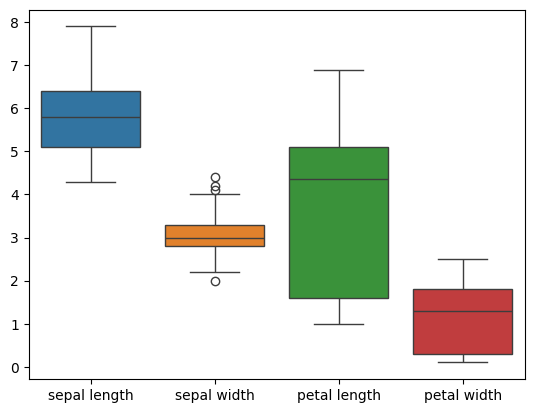

In [4]:
sns.boxplot(df)
# there is a lot of variations in petal lengths

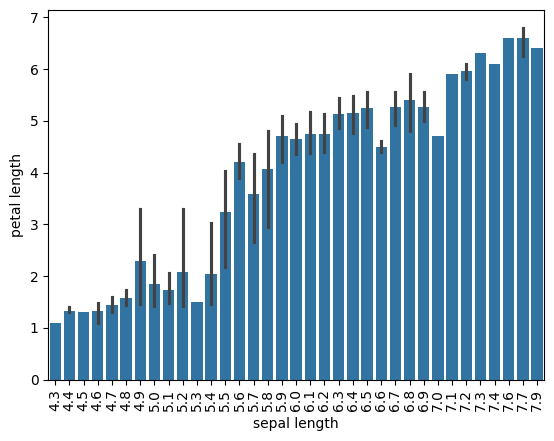

In [5]:
bp = sns.barplot(df, x = 'sepal length', y='petal length')
bp.tick_params("x", labelrotation=90)
# the sepal length seem to be correlated to petal length

<Axes: ylabel='Density'>

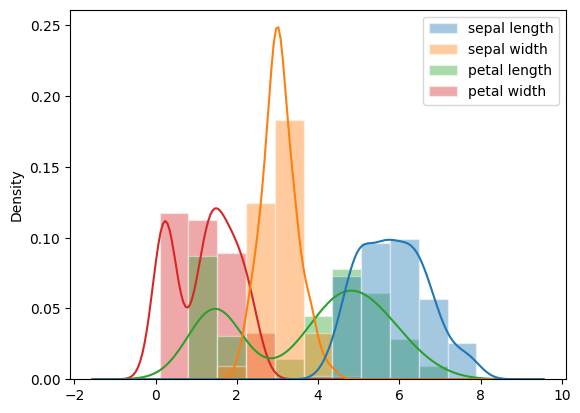

In [6]:
# distplot is depricated, https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751check https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
sns.histplot(df, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
# most of the sepal width is about 3
# petal width and sepal length seem to be concentrate in 1 and 6 respectively

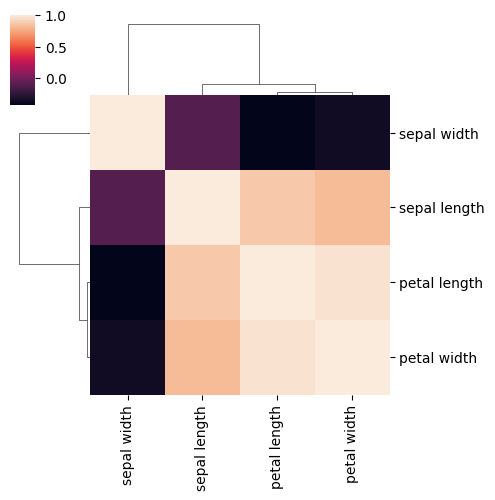

In [7]:
sns.clustermap(df.corr(numeric_only=True), figsize=(5, 5))
# everything except sepal width are correlate to eachother

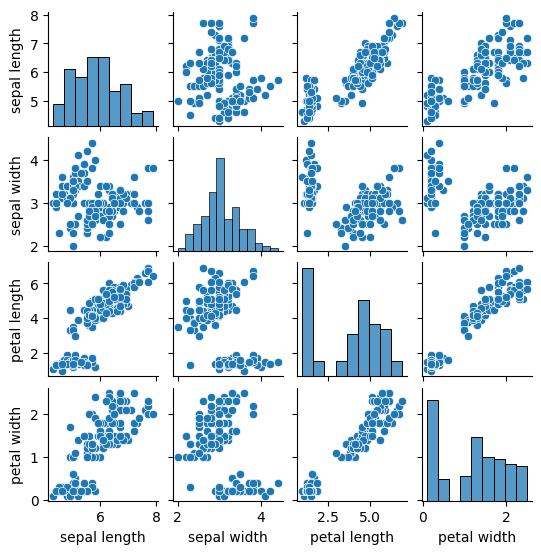

In [8]:
sns.pairplot(df, height=1.4)
# pair plot reinforce what clustermap shows

## Prepossessing Data

In [9]:
from sklearn.preprocessing import StandardScaler
# create standardscaler class to normalize data
scalar = StandardScaler()
scalar.fit(df.drop('class', axis=1))
scaled_features = scalar.transform(df.drop('class', axis=1))

In [10]:
# create a new dataframe with the scaled features and don't include the last column
# which is class
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [11]:
scaled_df

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## Train Test Split Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split train and test data 70:30
x_train, x_test, y_train, y_test = train_test_split(
    scaled_df, df['class'], test_size=0.30, random_state=42)

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# train knn with 40 neighbors
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

## Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
# compare actual result with predictions
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[19  0  0]
 [ 0 11  2]
 [ 0  3 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.79      0.85      0.81        13
 Iris-virginica       0.83      0.77      0.80        13

       accuracy                           0.89        45
      macro avg       0.87      0.87      0.87        45
   weighted avg       0.89      0.89      0.89        45



In [17]:
# finding the best neigbors value by looping through 1-40 then train and predict with knn
error_rate = []
for i in range(1, 45):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predict_i = knn.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error rate')

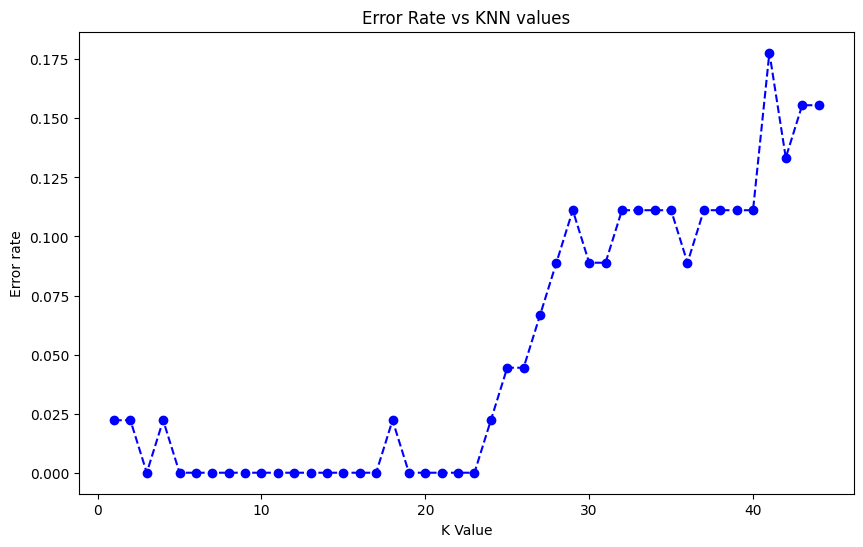

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45), error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs KNN values')
plt.xlabel('K Value')
plt.ylabel('Error rate')

## Prepossessing Data

In [19]:
from sklearn.preprocessing import StandardScaler
# create standardscaler class to normalize data
scalar = StandardScaler()
scalar.fit(df.drop(['class', 'petal width', 'petal length'], axis=1))
scaled_features = scalar.transform(df.drop(['class', 'petal width', 'petal length'], axis=1))

In [20]:
# create a new dataframe with the scaled features and don't include the last 3 column
# which is class, petal width/length
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-3])

In [21]:
scaled_df

,sepal length,sepal width
0,-0.900681,1.032057
1,-1.143017,-0.124958
2,-1.385353,0.337848
3,-1.506521,0.106445
4,-1.021849,1.263460
...,...,...
145,1.038005,-0.124958
146,0.553333,-1.281972
147,0.795669,-0.124958
148,0.432165,0.800654


## Train Test Split Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# split train and test data 70:30
x_train, x_test, y_train, y_test = train_test_split(
    scaled_df, df['class'], test_size=0.30, random_state=42)

## KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# train knn with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

## Evaluation

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
# compare actual result with predictions
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.54      0.54      0.54        13
 Iris-virginica       0.54      0.54      0.54        13

       accuracy                           0.73        45
      macro avg       0.69      0.69      0.69        45
   weighted avg       0.73      0.73      0.73        45



In [27]:
# finding the best neigbors value by looping through 1-40 then train and predict with knn
error_rate = []
for i in range(1, 45):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predict_i = knn.predict(x_test)
    error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error rate')

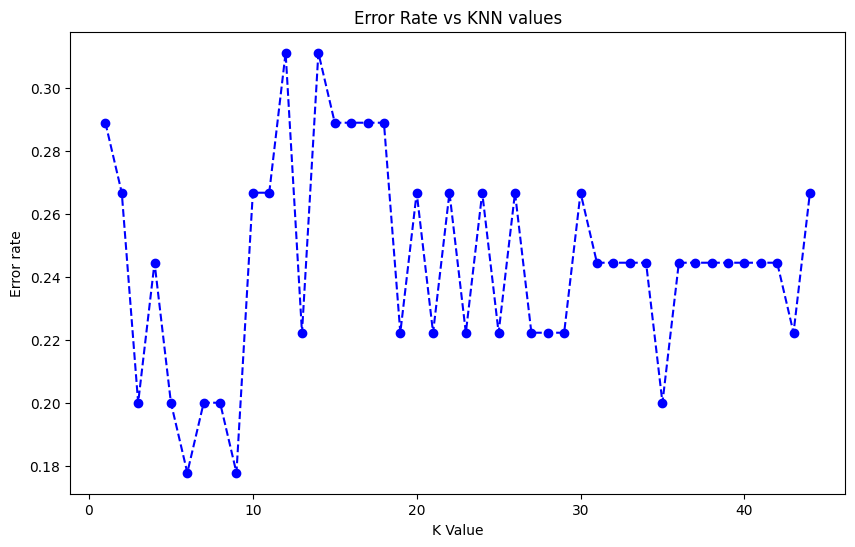

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45), error_rate, color='blue', linestyle='dashed', marker='o')
plt.title('Error Rate vs KNN values')
plt.xlabel('K Value')
plt.ylabel('Error rate')

In [29]:
# The error rate for 2 attributes are alot higher than 4 attributes
# with 2 attributes going only as low as 0.18, which 4 attributes go to 0.0 
# the over all metrics are also a lot lower for Iris-versicolor and Iris-virginica

# <b>Conclusion:</b>

# <b>References:</b>